In [1]:
#Steps 1-- Create 3 folder traing , testing and validation. 
# Training(2 folder happy and not happy)
!pip install opencv-python


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
img= image.load_img(r'C:\Users\HP\Pictures\shivani pic.jpeg')

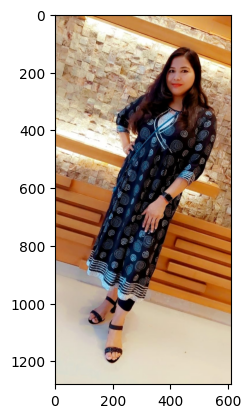

In [4]:
plt.imshow(img)

In [5]:
i1 = cv2.imread(r'C:\Users\HP\Pictures\shivani pic.jpeg')
i1

array([[[108, 140, 169],
        [109, 141, 170],
        [109, 141, 170],
        ...,
        [  5,  93, 183],
        [  7,  96, 187],
        [  7,  96, 187]],

       [[105, 137, 166],
        [106, 138, 167],
        [107, 139, 168],
        ...,
        [  7,  95, 185],
        [  9,  96, 188],
        [  8,  97, 188]],

       [[102, 134, 163],
        [103, 135, 164],
        [105, 137, 166],
        ...,
        [ 12,  98, 188],
        [ 12,  98, 188],
        [ 10,  98, 188]],

       ...,

       [[204, 220, 226],
        [204, 220, 226],
        [204, 220, 226],
        ...,
        [199, 221, 233],
        [199, 221, 233],
        [199, 221, 233]],

       [[204, 220, 226],
        [204, 220, 226],
        [204, 220, 226],
        ...,
        [199, 221, 233],
        [199, 221, 233],
        [199, 221, 233]],

       [[204, 220, 226],
        [204, 220, 226],
        [204, 220, 226],
        ...,
        [199, 221, 233],
        [199, 221, 233],
        [199, 221, 233]]

In [6]:
i1.shape

(1280, 610, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory(r'C:\Users\HP\Downloads\happy_sad\training',
                                          target_size=(200, 200),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory(r'C:\Users\HP\Downloads\happy_sad\Validation',
                                                    target_size=(200, 200),
                                                    batch_size=3,
                                                    class_mode='binary')


Found 12 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Happy Faces': 0, 'Sad Faces': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(lr =0.001 ),
             metrics = ['acc'])

In [13]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 4.7045 - acc: 0.4444 - val_loss: 3.4849 - val_acc: 0.3636
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1.8687 - acc: 0.3333 - val_loss: 0.7063 - val_acc: 0.3636
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.7199 - acc: 0.4444 - val_loss: 0.5710 - val_acc: 0.7273
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.5731 - acc: 0.6667 - val_loss: 0.5749 - val_acc: 0.6364
Epoch 5/10
3/3 [==============================] - 4s 2s/step - loss: 0.5392 - acc: 0.6667 - val_loss: 0.4383 - val_acc: 0.8182
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.5689 - acc: 0.6667 - val_loss: 0.4236 - val_acc: 0.7273
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.4549 - acc: 0.7778 - val_loss: 0.3333 - val_acc: 0.7273
Epoch 8/10
3/3 [==============================] - 5s 1s/step - loss: 0.6348 - acc: 0.5556 - val_loss: 0.3175 - 

In [14]:
history.history??

Object `history.history` not found.


Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 0.3908 - acc: 0.8889 - val_loss: 0.8370 - val_acc: 0.5455
Epoch 2/10
3/3 [==============================] - 3s 901ms/step - loss: 0.5664 - acc: 0.7778 - val_loss: 0.2801 - val_acc: 0.9091
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.2260 - acc: 0.8889 - val_loss: 0.1208 - val_acc: 1.0000
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.0891 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 1.0000
Epoch 5/10
3/3 [==============================] - 3s 946ms/step - loss: 0.0399 - acc: 1.0000 - val_loss: 0.0697 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.0526 - acc: 1.0000 - val_loss: 0.0288 - val_acc: 1.0000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.0301 - acc: 1.0000 - val_loss: 0.0240 - val_acc: 1.0000
Epoch 8/10
3/3 [==============================] - 3s 982ms/step - loss: 0.0146 - acc: 1.0000 - val_loss: 

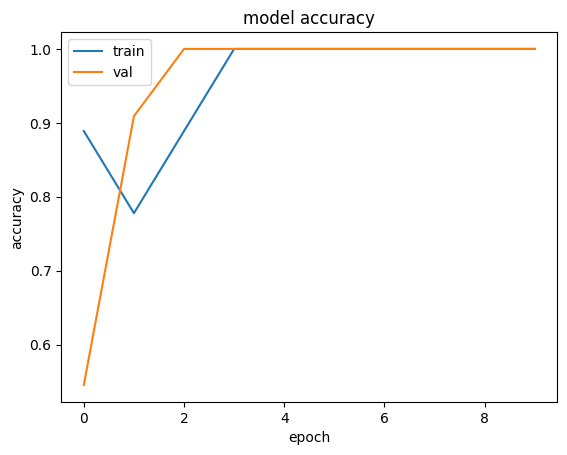

In [17]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

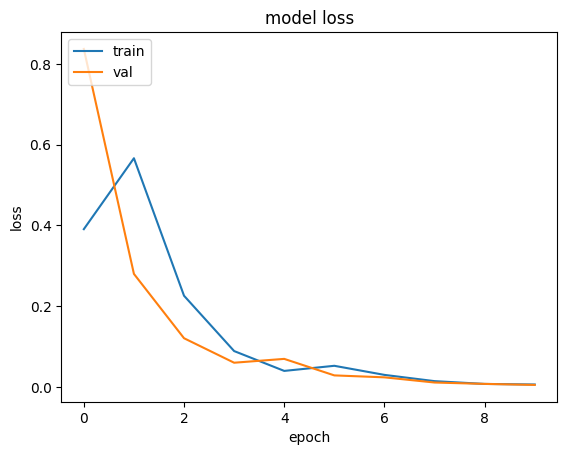

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [23]:
for i in os.listdir(r'C:\Users\HP\Downloads\happy_sad\testing'):
    print(i)


Happy Faces
Sad Faces


In [27]:
dir_path = r'C:\Users\HP\Downloads\happy_sad\testing'
dir_path

'C:\\Users\\HP\\Downloads\\happy_sad\\testing'

In [63]:
dir_path = r'C:\Users\HP\Downloads\happy_sad\testing'
for i in os.listdir(dir_path):
    print(i)

Happy Faces
Sad Faces


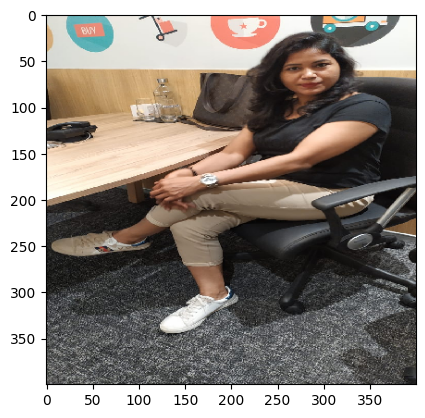

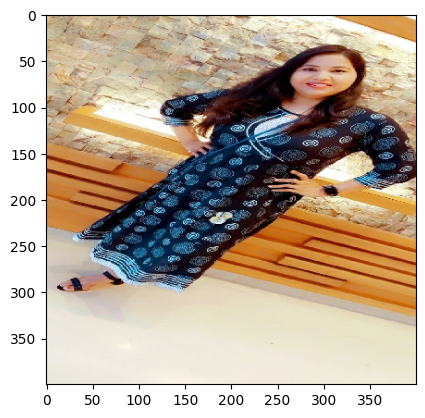

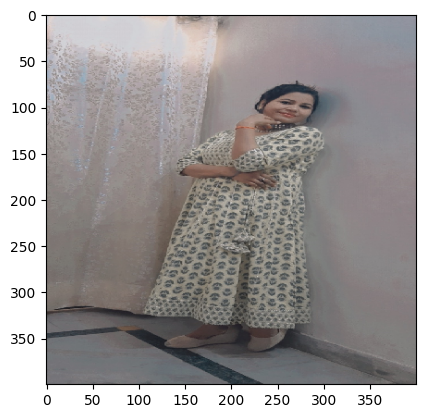

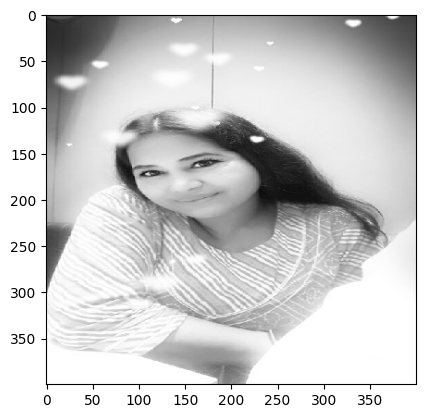

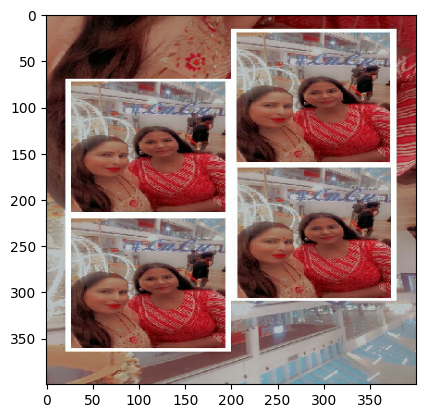

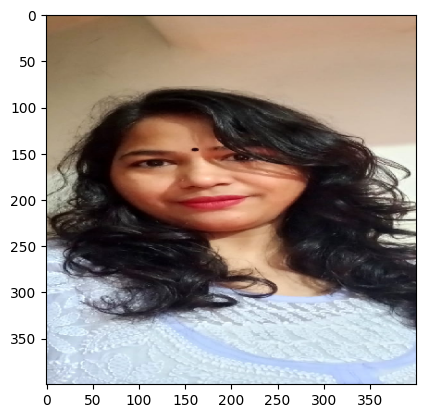

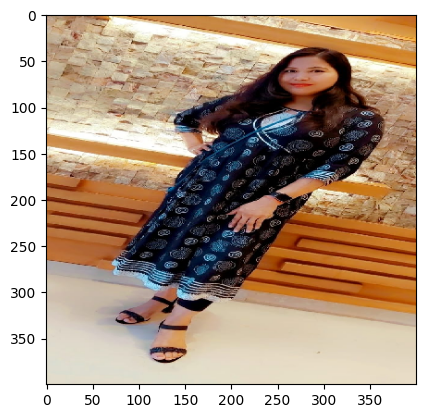

In [73]:
dir_path =  r'C:\Users\HP\Downloads\happy_sad\testing\Happy Faces'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '/'+i, target_size = (400,400))
    plt.imshow(img)
    plt.show()

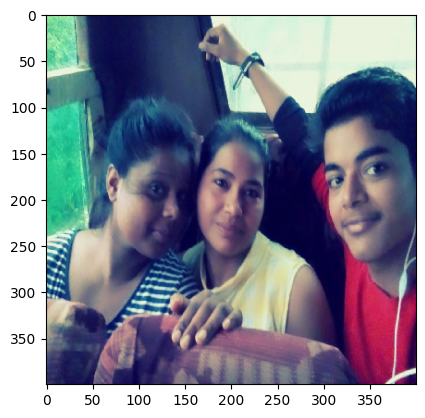

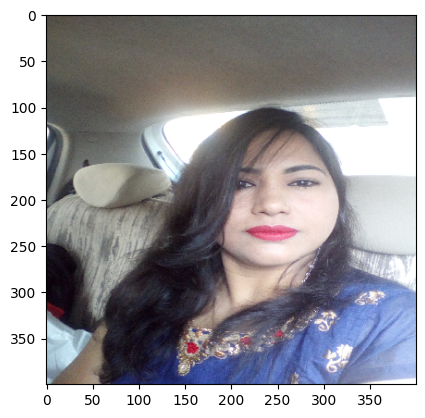

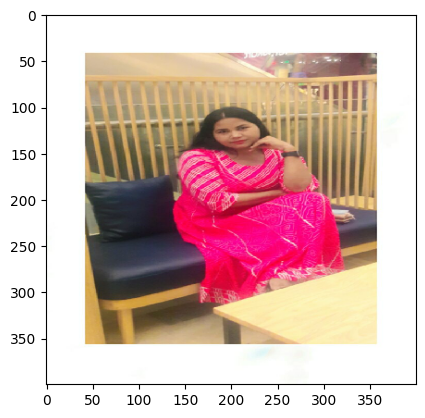

In [75]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

dir_path = r'C:\Users\HP\Downloads\happy_sad\testing\Sad Faces'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    
    if os.path.isfile(img_path):
        try:
            img = image.load_img(img_path, target_size=(400, 400))
            plt.imshow(img)
            plt.show()
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
